<a href="https://colab.research.google.com/github/JianlingTang/Glauber_implementation/blob/master/Glauber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics as stat


dr=0.554
w=0
R=6.62
a_0=0.546
A=207.2 
area=70
ballD=1.49271
d=7.5
rho0=3*A/(4*math.pi*R**3)

def density(r):
  rho=rho0*((1+w*(r/R)**2)/(1+math.exp((r-R)/a_0)))
  return rho

def Distance(a,b,c,d):
  one=a-b
  two=c-d
  Distance=math.sqrt(one**2+two**2)
  return Distance

def cov(x,y):
  sigma_xy=sum((a - sigma_x) * (b - sigma_y) for (a,b) in zip(x,y)) / len(x)
  return sigma_xy
liste2=[]
liste3=[]
listNpart=[]
listb=[]
listr = [4.8, 5.3, 4.4, 5.6, 2.8, 3.8, 6. , 4.7, 5. , 4.7, 3.6, 3.9, 7.4,
       3. , 6.3, 5.8, 6.3, 4.5, 5.9, 5.5, 5.4, 6.5, 5.9, 4.7, 5.1, 3.4,
       3.8, 5.8, 5.4, 3.7, 4.9, 6.9, 4.5, 4.7, 5.3, 5.5, 4.6, 8.1, 3.9,
       6.4, 2.6, 6.1, 4.1, 4.9, 5.9, 5.7, 6.1, 6.3, 5.4, 2.3, 5.4, 4.6,
       4.5, 4.6, 6.7, 5.8, 6.8, 8.3, 6.4, 5.4, 5.3, 4.7, 4.9, 7.1, 8. ,
       3.7, 4.2, 6.1, 4.5, 5.7, 2.1, 4.9, 5. , 5.5, 5.1, 6.6, 3. , 1.6,
       6.6, 5.1, 6.1, 6.8, 4.2, 4.8, 2.8, 5.1, 3.2, 6. , 6.2, 8.3, 5.8,
       3. , 4.8, 5.9, 4. , 5. , 5.8, 7.1, 6.8, 2.8, 1.5, 3.6, 3.2, 3.3,
       6.5, 4. , 4.9, 4.9, 4.3, 2. , 6.5, 6.3, 2.4, 3.4, 7.2, 5.2, 3.1,
       4.2, 6. , 6.4, 5.1, 6.7, 7.1, 7.2, 4.6, 5.3, 6.5, 5.4, 5.2, 6.8,
       5.7, 6.5, 6.8, 0.8, 7.5, 5.5, 7.7, 4.9, 6. , 4.6, 4.6, 2.1, 4.2,
       6.3, 2.7, 3.5, 3.8, 5.2, 4.1, 5. , 5.3, 8.5, 3. , 5.4, 5.6, 9.2,
       7.2, 5.6, 6.2, 5.4, 4.5, 6.9, 6.4, 4.6, 4.5, 6.4, 3.2, 6.4, 3.2,
       4.7, 3.1, 5.8, 4.8, 5.5, 5.5, 5.8, 6.5, 4.6, 2. , 8. , 6.4, 4.8,
       7.5, 7. , 4.2, 5.1, 7.2, 5.8, 6.8, 7.4, 5.8, 5.4, 3.4, 6.8, 2.7,
       5.2, 6.7, 4.4, 3.5, 2.4, 5.3, 6.9, 7.3, 3.2, 6.8, 5.9, 5.2, 1. ]

In [ ]:
for j in range(100000):
  listx1_par=[]
  listx2_par=[]
  listy1_par=[]
  listy2_par=[]
  listx1=[]
  listy1=[]
  listx2=[]
  listy2=[]
  listx_par=[]
  listy_par=[]
  Npart=0
  b=100

  while Npart<2:
    while b>2*d:
      c1_x=0
      c1_y=0
      c2_x=random.uniform(-2*d,2*d)
      c2_y=random.uniform(-2*d,2*d)
      b=math.sqrt((c1_x-c2_x)**2+(c1_y-c2_y)**2)

    for r in listr:
      #discard number(r) function , use 208 radii directly:
        phi1=random.uniform(0,2*math.pi)
        theta1=random.uniform(0,math.pi)
        phi2=random.uniform(0,2*math.pi)
        theta2=random.uniform(0,math.pi)
          
        x1=c1_x+r*math.sin(theta1)*math.cos(phi1)
        y1=c1_y+r*math.sin(theta1)*math.sin(phi1)
        x2=c2_x+r*math.sin(theta2)*math.cos(phi2)
        y2=c2_y+r*math.sin(theta2)*math.sin(phi2)

        listx1.append(x1)
        listx2.append(x2)
        listy1.append(y1)
        listy2.append(y2)
  #print(len(listx1))     

    for n1 in range(len(listx1)):
      for n2 in range(len(listx2)):
        an=listx1[n1]
        bn=listx2[n2]
        cn=listy1[n1]
        dn=listy2[n2]
        Dn=math.sqrt((an-bn)**2+(cn-dn)**2)
       
        if Dn <ballD:
          listx1_par.append(an)
          listy1_par.append(cn)
          break
    
         

    for m2 in range(len(listx2)):
      for m1 in range(len(listx1)):
        am=listx1[m1]
        bm=listx2[m2]
        cm=listy1[m1]
        dm=listy2[m2]
        Dm=math.sqrt((am-bm)**2+(cm-dm)**2)
        
        if Dm<ballD:
          listx2_par.append(listx2[m2])
          listy2_par.append(listy2[m2])
          break
           


        
    Npart=len(listx1_par)+len(listx2_par)
  listNpart.append(Npart)  
  listb.append(b)

  # participant x, y as a whole
  listx_par=listx1_par+listx2_par
  listy_par=listy1_par+listy2_par
  x_ave=stat.mean(listx_par)
  y_ave=stat.mean(listy_par)


  #shift coordinate to the center of mass
  listxprime=[]
  listyprime=[]
  listrprime=[]
  listphi=[]
  for x in listx_par:
    listxprime.append(x-x_ave)
  for y in listy_par:
    listyprime.append(y-y_ave)

  #calculate r and phi in the new polar coordinate:
  for n in range(0,len(listxprime)):
    rprime=np.sqrt(listxprime[n]**2+listyprime[n]**2)
    listrprime.append(rprime)
    phi=math.atan2(listyprime[n],listxprime[n])
    listphi.append(phi)
 #another way to calculate epsilon 2
  list1_e2=[]
  list2_e2=[]
  list3_e2=[]
  for n in range(Npart):
    part1_e2=listrprime[n]**2*math.cos(2*listphi[n])
    part2_e2=listrprime[n]**2*math.sin(2*listphi[n])
    part3_e2=listrprime[n]**2
    list1_e2.append(part1_e2)
    list2_e2.append(part2_e2)
    list3_e2.append(part3_e2)
  
  part1_e2_ave=stat.mean(list1_e2)
  part2_e2_ave=stat.mean(list2_e2)
  part3_e2_ave=stat.mean(list3_e2)
  e2=np.sqrt(part1_e2_ave**2+part2_e2_ave**2)/part3_e2_ave
  liste2.append(e2)

  #calculate e3
  list1=[]
  list2=[]
  list3=[]
  for n in range(Npart):
    part1=listrprime[n]**2*math.cos(3*listphi[n])
    part2=listrprime[n]**2*math.sin(3*listphi[n])
    part3=listrprime[n]**2
    list1.append(part1)
    list2.append(part2)
    list3.append(part3)

  part1_ave=stat.mean(list1)
  part2_ave=stat.mean(list2)
  part3_ave=stat.mean(list3)
  e3=np.sqrt(part1_ave**2+part2_ave**2)/part3_ave
  liste3.append(e3)

In [3]:
# importing mean() 
from statistics import mean 

#define average function which returns the mean value of the list 
def Average(list): 
    return mean(list) 
  
#geometric mean is a funciton that plotted the average value of every Number of participants(N_)
def geometricmean(x,y):
  tuples = list(zip(x,y)) 
  for i in range (416):
    new=[x for (x,y) in tuples if y == i]
    if new ==[]:
      continue
    else:
      tuples_new =[i]+[Average(new)]
      plt.scatter(tuples_new[0],tuples_new[1],s=10, facecolors='none', edgecolors='r')
      plt.xlabel('setx')
      plt.ylabel('sety')
      plt.title('settitle')

In [4]:
## get e_2_ave list from the geomrtricmean1 function
import numpy as np
liste2_ave = []
#define a fake x axis set 
x_plot = np.arange(0,416,13)

def geometricmean1(x,y):
  tuples = list(zip(x,y)) 
  for i in range (416):
    new=[x for (x,y) in tuples if y == i]
    if new ==[]:
      continue
    else:
      tuples_new =[i,Average(new)]
      liste2_ave.append(tuples_new[1])
  n=13
  a = [sum(liste2_ave[i:i+n])/n for i in range(0, len(liste2_ave), n)]
  return a

#get e_2 list 
e_2_ave = geometricmean1(liste2,listNpart)
#get e_3_ave
import numpy as np
liste3_ave = []
#define a fake x axis set 
x_plot = np.arange(0,416,13)

def geometricmean2(x,y):
  tuples = list(zip(x,y)) 
  for i in range (416):
    new=[x for (x,y) in tuples if y == i]
    if new ==[]:
      continue
    else:
      tuples_new =[i,Average(new)]
      liste3_ave.append(tuples_new[1])
  n=13
  a = [sum(liste3_ave[i:i+n])/n for i in range(0, len(liste3_ave), n)]
  return a

#get e_2 list 
e_3_ave = geometricmean2(liste3,listNpart)



Plot graphs 

In [5]:
err_e2 = []
for i in e_2_ave:
  err_e2.append(i*0.1)
err_e2.sort(reverse = True)

err_e3 = []
for i in e_2_ave:
  err_e3.append(i*0.1)
err_e3.sort(reverse = True)



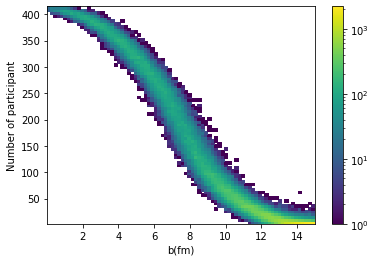

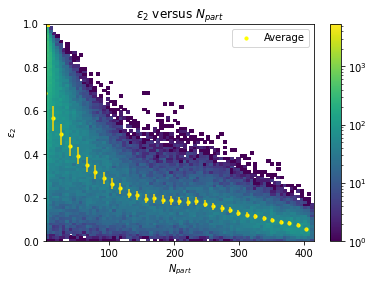

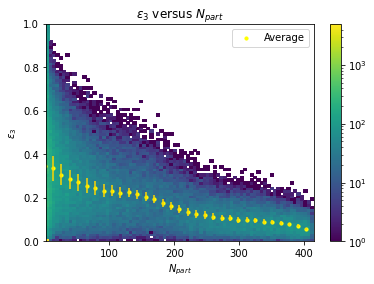

In [6]:
from matplotlib.colors import LogNorm
from pylab import *
plt.figure()
plt.hist2d(listb, listNpart, bins=80, norm=LogNorm())
plt.colorbar()
plt.xlabel("b(fm)")
plt.ylabel("Number of participant")


plt.figure()
plt.hist2d(listNpart, liste2, bins=80, norm=LogNorm())
plt.colorbar()
plt.scatter(x_plot, e_2_ave, label='Average', color='yellow',s=10)
plt.errorbar(x_plot,e_2_ave, yerr=err_e2, linestyle='None',color = 'gold')
plt.legend()
plt.xlabel('$N_{part}$')
plt.ylabel('$\epsilon_2$')
plt.title('$\epsilon_2$ versus $N_{part}$')
plt.ylim(0,1)


plt.figure()
plt.hist2d(listNpart, liste3, bins=80, label='data',norm=LogNorm())
plt.colorbar()
plt.scatter(x_plot, e_3_ave, label='Average', color='yellow',s=10)
plt.errorbar(x_plot,e_3_ave, yerr=err_e3, linestyle='None',color = 'gold')
plt.legend()

plt.xlabel('$N_{part}$')
plt.ylabel('$\epsilon_3$')
plt.title('$\epsilon_3$ versus $N_{part}$ ')
plt.ylim(0,1)

#adding error bars
plt.show()